In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def computeDifference(bg_img, input_img):
    # Tính toán giá trị khác biệt tuyệt đối giữa hai hình ảnh
    difference_three_channel = np.abs(bg_img - input_img)

    # Chuyển đổi sự khác biệt 3 kênh sang một kênh bằng cách tính trung bình.
    # Điều này giúp giảm dữ liệu khác biệt xuống một giá trị cường độ đơn lẻ.
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0

    # Chuyển đổi trở lại sang uint8 để phù hợp với xử lý ảnh.
    difference_single_channel = difference_single_channel.astype("uint8")

    return difference_single_channel

In [3]:
def computeBinaryMask(difference_single_channel, threshold=15):
    # Áp dụng ngưỡng (threshold) để tạo mask nhị phân
    # Các điểm ảnh có sự chênh lệch màu sắc lớn hơn hoặc bằng 15 được đặt là 255 (trắng), còn lại là 0 (đen).
    difference_binary = np.where(difference_single_channel >= threshold, 255, 0)

    # Ghép nối mask nhị phân thành 3 kênh để phù hợp với định dạng RGB.
    binary_binary = np.stack((difference_binary,) * 3, axis=-1)

    return binary_binary

In [4]:
def replaceBackGround(bg_image1, bg_image2, ob_image):
    # Tính toán sự khác biệt giữa hình ảnh đối tượng và hình nền thứ nhất
    difference_single_channel = computeDifference(bg_image1, ob_image)

    # Tính toán mask nhị phân dựa trên sự khác biêt
    binary_mask = computeBinaryMask(difference_single_channel)

    # Thay thế hình nền:
    # ở vị trí mà mask là trắng (255): thay thế bằng hình nền thứ hai.
    # ở vị trí mà mask là đen (0): giữ hình ảnh đối tượng.
    output = np.where(binary_mask == 255, ob_image, bg_image2)

    return output

In [5]:
bg_image1 = cv2.imread('background1.png')
bg_image2 = cv2.imread('background2.png')
ob_image = cv2.imread('object.png')

In [6]:
# Resize kích thuớc ảnh đầu vào
bg_image1 = cv2.resize(bg_image1, (640, 480))
bg_image2 = cv2.resize(bg_image2, (640, 480))
ob_image = cv2.resize(ob_image, (640, 480))

# Chuyển đổi ảnh màu từ hệ BRG sang hệ RGB
bg_image1 = cv2.cvtColor(bg_image1, cv2.COLOR_BGR2RGB)
bg_image2 = cv2.cvtColor(bg_image2, cv2.COLOR_BGR2RGB)
ob_image = cv2.cvtColor(ob_image, cv2.COLOR_BGR2RGB)

In [7]:
# Tiến hành background subtraction
output_image = replaceBackGround(bg_image1, bg_image2, ob_image)

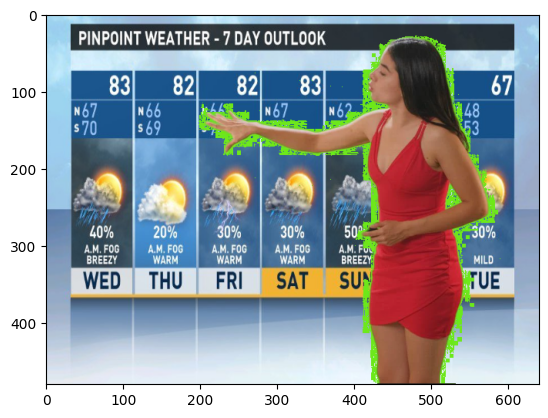

In [8]:
# Hiển thị kết quả
plt.imshow(output_image)